# IUI - Introduction to SVMs - Example 2
by Sven Mayer
### References
* https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html

In [21]:
import sklearn
import sklearn.svm
import numpy as np

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Data set

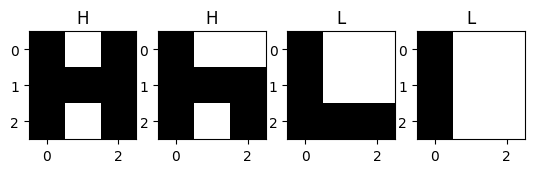

In [22]:
x = np.array([
    [1,0,1, 
     1,1,1, 
     1,0,1], [1,0,0,1,1,1,1,0,1], [1,0,0,1,0,0, 1,1,1] ,[1,0,0,1,0,0,1,0,0]])
y = [0,0,1,1]
value_map = {0:'H', 1:'L'}

def mymap(y_input):
    ret = []
    for i in y_input:
        ret.append(value_map[i])
    return ret

fig, ax = plt.subplots(1,4)
for i in range(4):
    ax[i].imshow(1-x[i].reshape((3,3)), cmap="gray")
    ax[i].set_title(value_map[y[i]])

# Training

In [23]:
classifier = sklearn.svm.SVC(gamma=0.001, kernel="linear")

classifier.fit(x, y)

SVC(gamma=0.001, kernel='linear')

# Testing

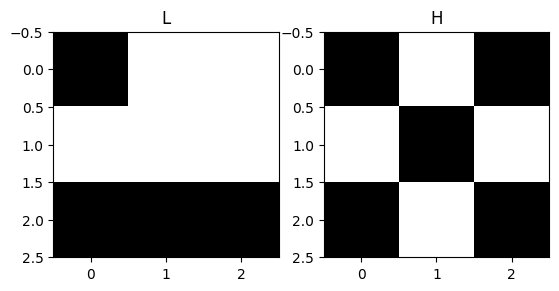

In [24]:
x_test = np.array([[1,0,0,0,0,0,1,1,1], [1,0,1,0,1,0,1,0,1,]])
y_test = [1,0]

fig, ax = plt.subplots(1,2)
for i in range(2):
    ax[i].imshow(1-x_test[i].reshape((3,3)), cmap="gray")
    ax[i].set_title(value_map[y_test[i]])
    
    


In [25]:
y_predict = classifier.predict(x_test)
mymap(y_predict)

['L', 'H']

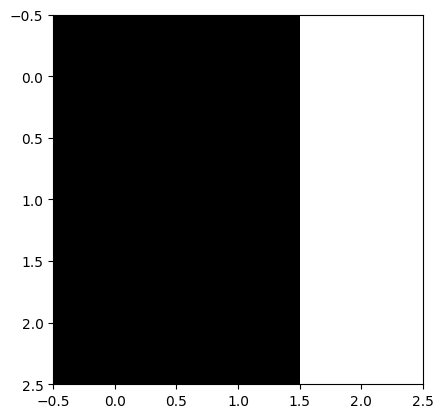

In [26]:
z_test = np.array([[0,0,1,0,0,1,0,0,1]])
plt.imshow(z_test[0].reshape(3,3), cmap="gray")



In [27]:
y_predict = classifier.predict(z_test)
mymap(y_predict)

['H']

# Dataset 8x8 input - Hand-written digits datasets 
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

Subset of http://yann.lecun.com/exdb/mnist/ The training set contains 60000 examples, and the test set 10000 examples.

In [28]:
import sklearn.datasets
digits = sklearn.datasets.load_digits()

In [29]:
len(digits['target'])

1797

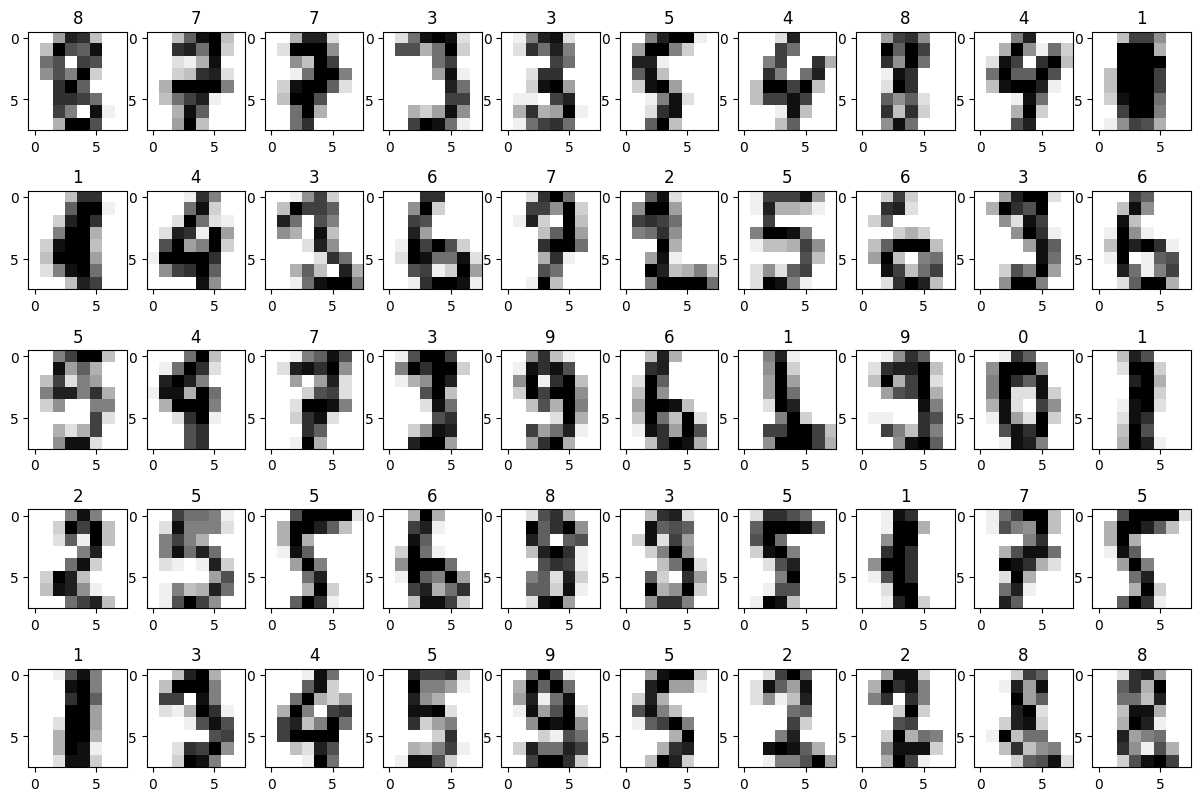

In [30]:
i = 100
dim = (5, 10)
fig, ax = plt.subplots(dim[0], dim[1], figsize=(15, 10))
ax = ax.flatten()
np.random.seed(0); ids = np.random.randint(len(digits['target']), size=(dim[0]* dim[1]))
for i in range(dim[0]* dim[1]):
    j = np.random.randint(len(digits['target']))
    ax[i].imshow(1-digits['images'][ids[i]], cmap="gray")
    ax[i].set_title("%i" % digits['target'][ids[i]])

In [31]:
x = []
y = []
for i in range(10):
    
    x.append(digits['images'][digits['target'] == i].reshape((-1, 8 * 8)))
    y.append(digits['target'][digits['target'] == i])
    
x = np.concatenate(x)    
y = np.concatenate(y)

In [32]:
import sklearn.model_selection

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.5, shuffle=True)

In [33]:
classifier = sklearn.svm.SVC(gamma=0.001, kernel="linear")
classifier.fit(X_train, y_train)

SVC(gamma=0.001, kernel='linear')

In [34]:
n_samples = len(set(list(y)))

Classification report for classifier SVC(gamma=0.001, kernel='linear'):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        85
           1       0.92      1.00      0.96        87
           2       0.99      1.00      0.99        97
           3       0.97      0.94      0.96        90
           4       0.97      0.99      0.98        89
           5       0.94      0.97      0.95        98
           6       0.99      0.97      0.98        80
           7       0.99      0.97      0.98       102
           8       0.97      0.87      0.92        84
           9       0.93      0.94      0.94        87

    accuracy                           0.97       899
   macro avg       0.97      0.96      0.96       899
weighted avg       0.97      0.97      0.97       899




Text(0.5, 0.98, 'Confusion Matrix')

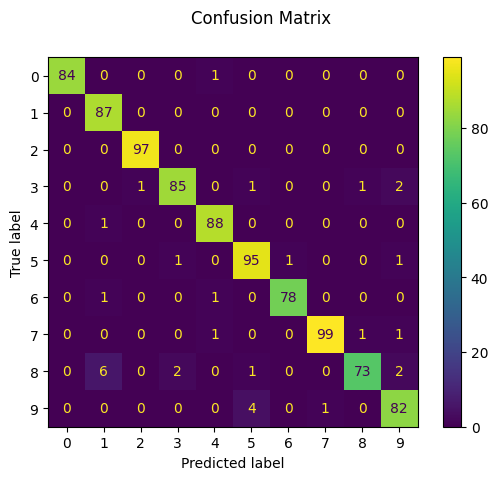

In [35]:
predicted = classifier.predict(X_test)


import sklearn.metrics
print("Classification report for classifier %s:\n%s\n"
      % (classifier, sklearn.metrics.classification_report(y_test, predicted)))
disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
# print("Confusion matrix:\n%s" % disp.confusion_matrix)

In [19]:
f  = predicted - y_test != 0
x_wrong = X_test[f]
y_wrong = y_test[f]
y_pred_wrong = predicted[f]

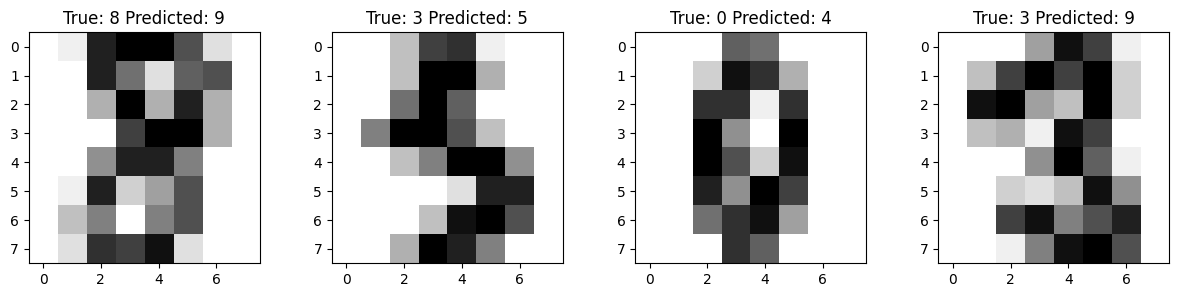

In [20]:
fig, ax = plt.subplots(1, 4, figsize=(15, 3))
for i in range(4):
    ax[i].imshow(1-x_wrong[i].reshape((8,8)), cmap="gray")
    ax[i].set_title("True: %i Predicted: %i" % (y_wrong[i], y_pred_wrong[i]))